# Лабораторна робота №4
## ФБ-35 Рабінов Костянтин
## Структури для роботи з великими обсягами даних в Python

**Мета роботи**: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)

**Основні поняття**: numpy масиви, кортежі, списки, фрейми, профілювання.

### Імпортуємо необхідні бібліотеки

In [ ]:
import os
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import timeit
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("бібліотеки імпортовано")


бібліотеки імпортовано


### Завантаження та підготовка даних

In [2]:
def downloader(url):
    if not os.path.exists("data"):
        os.makedirs("data")
    
    response = requests.get(url)
    if response.status_code == 200:
        filename = os.path.join("data", url.split("/")[-1])
        
        with open(filename, "wb") as file:
            file.write(response.content)
        
        if zipfile.is_zipfile(filename):
            with zipfile.ZipFile(filename, "r") as zip_ref:
                zip_ref.extractall("data")
        
        print(f"File '{filename}' встановлено успішно")
        return filename
    else:
        print(f"Проблема із завантаження. Код помилики: {response.status_code}")
        return None

url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
file_path = downloader(url)

File 'data\individual+household+electric+power+consumption.zip' встановлено успішно


### Завдання першого рівня

#### 1. Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.

##### Використання pandas DataFrame

In [ ]:
file = "data\household_power_consumption.txt"
start = datetime.now()
df = pd.read_csv(file, sep=';', na_values='?')
df.dropna(inplace=True)
end = datetime.now()
print(f"Execution time is {end - start}")
print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df.tail(10)


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_5216\440730811.py:1: SyntaxWarning: invalid escape sequence '\h'
  file = "data\household_power_consumption.txt"


Execution time is 0:00:01.612298
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075249,2010-11-26,20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0
2075250,2010-11-26,20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0
2075251,2010-11-26,20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0
2075252,2010-11-26,20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0
2075253,2010-11-26,20:57:00,0.946,0.0,240.33,4.0,0.0,0.0,0.0
2075254,2010-11-26,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,2010-11-26,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [ ]:
start = datetime.now()

power = df[df["Global_active_power"] > 5]

print("Rows:", len(power))

end = datetime.now()

print("Time:", end - start)

power.head()

Rows: 17547
Time: 0:00:00.007354


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


##### Використання Нumpy масив

In [ ]:
start = datetime.now()

data_np = df.to_numpy()

gap_index = df.columns.get_loc('Global_active_power')

filtered_np = data_np[data_np[:, gap_index] > 5]

end = datetime.now()

print("Кількість записів (numpy):", filtered_np.shape[0])
print("Час виконання (numpy):", end - start)

print(filtered_np[:5])

Кількість записів (numpy): 17547
Час виконання (numpy): 0:00:01.778796
[[Timestamp('2006-12-16 00:00:00') datetime.time(17, 25) 5.36 0.436
  233.63 23.0 0.0 1.0 16.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 26) 5.374 0.498
  233.29 23.0 0.0 2.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 27) 5.388 0.502
  233.74 23.0 0.0 1.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 35) 5.412 0.47
  232.78 23.2 0.0 1.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 36) 5.224 0.478
  232.99 22.4 0.0 1.0 16.0]]


In [6]:

numpy_time = timeit.timeit(
    'data_np[data_np[:, gap_index] > 5]',
    globals=globals(),
    number=1000
)

print("Профілювання (numpy):", numpy_time, "секунд")
pandas_time = timeit.timeit(
    'df[df["Global_active_power"] > 5]',
    globals=globals(),
    number=1000
)

print("Профілювання (pandas):", pandas_time, "секунд")


Профілювання (numpy): 46.31251340000017 секунд
Профілювання (pandas): 4.177909499994712 секунд


#### 2. Обрати всі записи, у яких вольтаж перевищую 235 В.


##### Використання pandas DataFrame

In [ ]:
start = datetime.now()

voltage_df = df[df['Voltage'] > 235]

end = datetime.now()

print("Кількість записів з voltage > 235:", len(voltage_df))
print("Час виконання:", end - start)

voltage_df.head()

Кількість записів з voltage > 235: 1952491
Час виконання: 0:00:00.094698


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


##### Використання Нumpy масив

In [ ]:

voltage_index = df.columns.get_loc('Voltage')

start = datetime.now()

voltage_np = data_np[data_np[:, voltage_index] > 235]

end = datetime.now()

print("Кількість записів з voltage > 235 (numpy):", voltage_np.shape[0])
print("Час виконання (numpy):", end - start)

print(voltage_np[:5])

Кількість записів з voltage > 235 (numpy): 1952491
Час виконання (numpy): 0:00:00.168431
[[Timestamp('2006-12-16 00:00:00') datetime.time(17, 28) 3.666 0.528
  235.68 15.8 0.0 1.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 29) 3.52 0.522
  235.02 15.0 0.0 2.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 30) 3.702 0.52
  235.09 15.8 0.0 1.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 31) 3.7 0.52 235.22
  15.8 0.0 1.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(17, 38) 4.054 0.422
  235.24 17.6 0.0 1.0 17.0]]


In [ ]:

numpy_voltage_time = timeit.timeit(
    'data_np[data_np[:, voltage_index] > 235]',
    globals=globals(),
    number=100
)

print("Профілювання (numpy) для voltage > 235:", numpy_voltage_time, "секунд")
pandas_voltage_time = timeit.timeit(
    'df[df["Voltage"] > 235]',
    globals=globals(),
    number=100
)

print("Профілювання (pandas) для voltage > 235:", pandas_voltage_time, "секунд")

Профілювання (numpy) для voltage > 235: 27.311541400005808 секунд
Профілювання (pandas) для voltage > 235: 10.598668300001009 секунд


#### 3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

##### Використання pandas DataFrame

In [10]:
start_pandas = datetime.now()
result_pandas = df[(df['Global_intensity'] >= 19) &
                   (df['Global_intensity'] <= 20) &
                   (df['Sub_metering_2'] > df['Sub_metering_3'])]
end_pandas = datetime.now()

print("Pandas - кількість записів:", len(result_pandas))
print("Pandas - час виконання:", end_pandas - start_pandas)
print(result_pandas.head())

pandas_profile_time = timeit.timeit(
    'df[(df["Global_intensity"] >= 19) & (df["Global_intensity"] <= 20) & (df["Sub_metering_2"] > df["Sub_metering_3"])]',
    globals=globals(),
    number=100
)
print("Профілювання (pandas):", pandas_profile_time, "секунд")

Pandas - кількість записів: 2509
Pandas - час виконання: 0:00:00.014206
          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
45  2006-12-16  18:09:00                4.464                  0.136   234.66   
460 2006-12-17  01:04:00                4.582                  0.258   238.08   
464 2006-12-17  01:08:00                4.618                  0.104   239.61   
475 2006-12-17  01:19:00                4.636                  0.140   237.37   
476 2006-12-17  01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  
Профілюва

##### Використання Нumpy масив

In [ ]:

gi_idx = df.columns.get_loc('Global_intensity')
sub2_idx = df.columns.get_loc('Sub_metering_2')
sub3_idx = df.columns.get_loc('Sub_metering_3')

start_np = datetime.now()
mask = (data_np[:, gi_idx] >= 19) & (data_np[:, gi_idx] <= 20) & (data_np[:, sub2_idx] > data_np[:, sub3_idx])
result_numpy = data_np[mask]
end_np = datetime.now()

print("Numpy - кількість записів:", result_numpy.shape[0])
print("Numpy - час виконання:", end_np - start_np)
print(result_numpy[:5])

numpy_profile_time = timeit.timeit(
    '(data_np[:, gi_idx] >= 19) & (data_np[:, gi_idx] <= 20) & (data_np[:, sub2_idx] > data_np[:, sub3_idx])',
    globals=globals(),
    number=100
)
print("Профілювання (numpy):", numpy_profile_time, "секунд")

Numpy - кількість записів: 2509
Numpy - час виконання: 0:00:00.111827
[[Timestamp('2006-12-16 00:00:00') datetime.time(18, 9) 4.464 0.136
  234.66 19.0 0.0 37.0 16.0]
 [Timestamp('2006-12-17 00:00:00') datetime.time(1, 4) 4.582 0.258 238.08
  19.6 0.0 13.0 0.0]
 [Timestamp('2006-12-17 00:00:00') datetime.time(1, 8) 4.618 0.104 239.61
  19.6 0.0 27.0 0.0]
 [Timestamp('2006-12-17 00:00:00') datetime.time(1, 19) 4.636 0.14 237.37
  19.4 0.0 36.0 0.0]
 [Timestamp('2006-12-17 00:00:00') datetime.time(1, 20) 4.634 0.152
  237.17 19.4 0.0 35.0 0.0]]
Профілювання (numpy): 10.247293500004162 секунд


#### 4. Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

##### Використання pandas DataFrame

In [ ]:
start_pd = datetime.now()
sample_df = df.sample(n=500000, replace=False, random_state=42)
mean_sub1_pd = sample_df['Sub_metering_1'].mean()
mean_sub2_pd = sample_df['Sub_metering_2'].mean()
mean_sub3_pd = sample_df['Sub_metering_3'].mean()
end_pd = datetime.now()

print("Pandas Sample:")
print("Середнє sub_metering_1:", mean_sub1_pd)
print("Середнє sub_metering_2:", mean_sub2_pd)
print("Середнє sub_metering_3:", mean_sub3_pd)
print("Час виконання (pandas):", end_pd - start_pd)

pandas_profile_time = timeit.timeit(
    'df.sample(n=500000, replace=False, random_state=42)[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean()',
    globals=globals(),
    number=100
)
print("Профілювання (pandas):", pandas_profile_time, "секунд")

Pandas Sample:
Середнє sub_metering_1: 1.119258
Середнє sub_metering_2: 1.308912
Середнє sub_metering_3: 6.45295
Час виконання (pandas): 0:00:00.230111
Профілювання (pandas): 23.64688830000523 секунд


##### Використання numpy array

In [ ]:
num_rows = data_np.shape[0]
sub1_idx = df.columns.get_loc('Sub_metering_1')
sub2_idx = df.columns.get_loc('Sub_metering_2')
sub3_idx = df.columns.get_loc('Sub_metering_3')

start_np = datetime.now()
sample_indices = np.random.choice(num_rows, size=500000, replace=False)
sample_np = data_np[sample_indices, :]
mean_sub1_np = np.mean(sample_np[:, sub1_idx])
mean_sub2_np = np.mean(sample_np[:, sub2_idx])
mean_sub3_np = np.mean(sample_np[:, sub3_idx])
end_np = datetime.now()

print("\nNumpy Sample:")
print("Середнє sub_metering_1:", mean_sub1_np)
print("Середнє sub_metering_2:", mean_sub2_np)
print("Середнє sub_metering_3:", mean_sub3_np)
print("Час виконання (numpy):", end_np - start_np)

def numpy_sample_means():
    sample_idx = np.random.choice(num_rows, size=500000, replace=False)
    sample_arr = data_np[sample_idx, :]
    m1 = np.mean(sample_arr[:, sub1_idx])
    m2 = np.mean(sample_arr[:, sub2_idx])
    m3 = np.mean(sample_arr[:, sub3_idx])
    return m1, m2, m3


numpy_profile_time = timeit.timeit('numpy_sample_means()', globals=globals(), number=100)
print("Профілювання (numpy):", numpy_profile_time, "секунд")


Numpy Sample:
Середнє sub_metering_1: 1.135654
Середнє sub_metering_2: 1.297006
Середнє sub_metering_3: 6.474876
Час виконання (numpy): 0:00:01.227361
Профілювання (numpy): 123.53557259999798 секунд


#### 5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

##### Використання pandas DataFrame

In [14]:
start = datetime.now()
filtered = df[(df['Time'] > pd.to_datetime('18:00:00').time()) & (df['Global_active_power'] > 6)]
filtered = filtered[(filtered['Sub_metering_2'] > filtered['Sub_metering_1']) & (filtered['Sub_metering_2'] > filtered['Sub_metering_3'])]
half1 = filtered.iloc[:len(filtered) // 2].iloc[2::3]
half2 = filtered.iloc[len(filtered) // 2:].iloc[3::4]
concatanetion = pd.concat([half1, half2])
end = datetime.now()
print(f"Time: {end - start}")
print(f"DF rows: {concatanetion.shape[0]}")
concatanetion.head(5)

Time: 0:00:00.100406
DF rows: 308


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
43,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
3007,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
17497,2006-12-28,21:01:00,7.062,0.270,235.76,30.2,2.0,65.0,17.0
17500,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
17503,2006-12-28,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0


##### Використання numpy array

In [ ]:


start = datetime.now()


time_18 = time(18, 0, 0)

filtered = data_np[
    (data_np[:, 1] > time_18) &
    (data_np[:, 2] > 6) &
    (data_np[:, 7] > data_np[:, 6]) &
    (data_np[:, 7] > data_np[:, 8])
]

group1 = filtered[:len(filtered)//2]
group2 = filtered[len(filtered)//2:]

each3 = group1[::3]
each4 = group2[::4]

concatanetion = np.concatenate((each3, each4), axis=0)

end = datetime.now()
print(f"Time: {end - start}")
print(f"DF rows: {concatanetion.shape[0]}")
print(concatanetion[:5])

Time: 0:00:00.119226
DF rows: 310
[[Timestamp('2006-12-16 00:00:00') datetime.time(18, 5) 6.052 0.192
  232.93 26.2 0.0 37.0 17.0]
 [Timestamp('2006-12-16 00:00:00') datetime.time(18, 8) 6.308 0.116
  232.25 27.0 0.0 36.0 17.0]
 [Timestamp('2006-12-28 00:00:00') datetime.time(20, 58) 6.386 0.374
  236.63 27.0 1.0 36.0 17.0]
 [Timestamp('2006-12-28 00:00:00') datetime.time(21, 2) 8.088 0.262 235.5
  34.4 1.0 72.0 17.0]
 [Timestamp('2006-12-28 00:00:00') datetime.time(21, 5) 7.23 0.152 235.22
  30.6 1.0 73.0 17.0]]


### Завдання другого рівня

In [2]:
headers = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]


In [ ]:

start_time = timeit.default_timer()

df = pd.read_csv(
    "adult.data",        
    delimiter=",",     
    names=headers,      
    na_values=["?"],     
    skipinitialspace=True 
)

stop_time = timeit.default_timer()

print("Pandas load time:", stop_time - start_time, "seconds")
print(df.head())
print("DataFrame shape:", df.shape)


Pandas load time: 0.05700020000222139 seconds
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50

In [ ]:

start_time = timeit.default_timer()

data = np.genfromtxt(
    "adult.data",      
    delimiter=",",     
    dtype=str,         
    skip_header=0      
)

stop_time = timeit.default_timer()

print("\nNumpy load time:", stop_time - start_time, "seconds")
print(data[:5]) 
print("Data shape:", data.shape)



Numpy load time: 0.36058529999718303 seconds
[['39' ' State-gov' ' 77516' ' Bachelors' ' 13' ' Never-married'
  ' Adm-clerical' ' Not-in-family' ' White' ' Male' ' 2174' ' 0' ' 40'
  ' United-States' ' <=50K']
 ['50' ' Self-emp-not-inc' ' 83311' ' Bachelors' ' 13'
  ' Married-civ-spouse' ' Exec-managerial' ' Husband' ' White' ' Male'
  ' 0' ' 0' ' 13' ' United-States' ' <=50K']
 ['38' ' Private' ' 215646' ' HS-grad' ' 9' ' Divorced'
  ' Handlers-cleaners' ' Not-in-family' ' White' ' Male' ' 0' ' 0' ' 40'
  ' United-States' ' <=50K']
 ['53' ' Private' ' 234721' ' 11th' ' 7' ' Married-civ-spouse'
  ' Handlers-cleaners' ' Husband' ' Black' ' Male' ' 0' ' 0' ' 40'
  ' United-States' ' <=50K']
 ['28' ' Private' ' 338409' ' Bachelors' ' 13' ' Married-civ-spouse'
  ' Prof-specialty' ' Wife' ' Black' ' Female' ' 0' ' 0' ' 40' ' Cuba'
  ' <=50K']]
Data shape: (32561, 15)



#### 1. Поборотися із зниклими даними.

##### Перевіряємо кількість пропущених значень у кожній колонці

In [7]:

print("Кількість пропущених значень у кожній колонці:")
print(df.isnull().sum())
print("\nРозмір первинного DataFrame:", df.shape)


Кількість пропущених значень у кожній колонці:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Розмір первинного DataFrame: (32561, 15)


##### 1. Метод: Видалення всіх рядків, де є хоча б один NaN (dropna)

In [8]:
df_copy = df.copy()

start_time = timeit.default_timer()

df_copy.replace('?', np.nan, inplace=True)
df_copy.dropna(inplace=True)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

print(df_copy.head())


Exec time:  0.027735299998312257
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1       

##### 2. Метод: Заповнення (імпутація) пропущених значень

In [9]:
df_impute = df.copy()

##### 2.1. Заповнення методом forward fill (ffill) – кожне NaN заповнюється попереднім значенням

In [10]:
df_ffill = df.fillna(method="ffill")
print("\nПриклад DataFrame після forward fill:")
print(df_ffill.head())


Приклад DataFrame після forward fill:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1  

C:\Users\User\AppData\Local\Temp\ipykernel_6548\3673277950.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method="ffill")


##### 2.2. Заповнення числових колонок статистичними показниками (mean) та категоріальних – модою

In [11]:
df_stat = df.copy()

##### Для числових колонок (типу int або float) заповнюємо пропуски середнім

In [12]:
numeric_cols = df_stat.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    mean_val = df_stat[col].mean()
    df_stat[col].fillna(mean_val, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6548\3698120638.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stat[col].fillna(mean_val, inplace=True)


##### Для категоріальних колонок заповнюємо пропуски модою (найчастіше значення)

In [13]:
categorical_cols = df_stat.select_dtypes(include="object").columns
for col in categorical_cols:
    mode_val = df_stat[col].mode()[0]
    df_stat[col].fillna(mode_val, inplace=True)

print("\nПриклад DataFrame після заповнення статистичними показниками:")
print(df_stat.head())


Приклад DataFrame після заповнення статистичними показниками:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  Un

C:\Users\User\AppData\Local\Temp\ipykernel_6548\3429355473.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stat[col].fillna(mode_val, inplace=True)


##### Також можна перевірити, що у DataFrame більше немає пропущених значень:

In [14]:
print("\nПеревірка пропущених значень після імпутації:")
print(df_stat.isnull().sum())


Перевірка пропущених значень після імпутації:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


#### Numpy

##### 1. Видалення рядків з пропущеними значеннями

In [42]:
data_copy = data.copy()
start_time = timeit.default_timer()

data_copy[data_copy == '?'] = np.nan
data_clean = data_copy[~np.any(data_copy == "nan", axis=1)]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data_clean[:5])


Exec time:  0.034643399994820356
[['0.30136986301369867' ' State-gov' '0.04430189755640375' ' Bachelors'
  '0.7999999999999998' ' Never-married' ' Adm-clerical' ' Not-in-family'
  ' White' ' Male' '0.021740217402174022' '0.0' '0.39795918367346944'
  ' United-States' ' <=50K']
 ['0.45205479452054803' ' Self-emp-not-inc' '0.04823759525135492'
  ' Bachelors' '0.7999999999999998' ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' '0.0' '0.0'
  '0.12244897959183676' ' United-States' ' <=50K']
 ['0.28767123287671237' ' Private' '0.1381134458917972' ' HS-grad'
  '0.5333333333333333' ' Divorced' ' Handlers-cleaners' ' Not-in-family'
  ' White' ' Male' '0.0' '0.0' '0.39795918367346944' ' United-States'
  ' <=50K']
 ['0.4931506849315069' ' Private' '0.1510683093139186' ' 11th'
  '0.3999999999999999' ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' '0.0' '0.0' '0.39795918367346944'
  ' United-States' ' <=50K']
 ['0.15068493150684936' ' Private' '0.2214

In [43]:
start_time = timeit.default_timer()
def mode(array):
    modes = []
    for column in array.T:
        clean_column = column[column != '?']
        unique, number = np.unique(clean_column, return_counts=True)
        mode_index = np.argmax(number)
        mode_value = unique[mode_index]
        modes.append(mode_value)
    return modes

def replace(array, modes):
    for i, column in enumerate(array.T):
        missing = np.where(column == '?')[0]
        column[missing] = modes[i]

modes = mode(data)
replace(data, modes)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data[:5])
print(modes)


Exec time:  0.2714762000105111
[['0.30136986301369867' ' State-gov' '0.04430189755640375' ' Bachelors'
  '0.7999999999999998' ' Never-married' ' Adm-clerical' ' Not-in-family'
  ' White' ' Male' '0.021740217402174022' '0.0' '0.39795918367346944'
  ' United-States' ' <=50K']
 ['0.45205479452054803' ' Self-emp-not-inc' '0.04823759525135492'
  ' Bachelors' '0.7999999999999998' ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' '0.0' '0.0'
  '0.12244897959183676' ' United-States' ' <=50K']
 ['0.28767123287671237' ' Private' '0.1381134458917972' ' HS-grad'
  '0.5333333333333333' ' Divorced' ' Handlers-cleaners' ' Not-in-family'
  ' White' ' Male' '0.0' '0.0' '0.39795918367346944' ' United-States'
  ' <=50K']
 ['0.4931506849315069' ' Private' '0.1510683093139186' ' 11th'
  '0.3999999999999999' ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' '0.0' '0.0' '0.39795918367346944'
  ' United-States' ' <=50K']
 ['0.15068493150684936' ' Private' '0.221488

#### 2. Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

#### Стандартизація

In [ ]:
#    0 -> age
#    2 -> fnlwgt
#    4 -> education_num
#    10 -> capital_gain
#    11 -> capital_loss
#    12 -> hours_per_week
num_col_index = [0, 2, 4, 10, 11, 12]

start_time = timeit.default_timer()

for idx in num_col_index:
    data = df.iloc[:, idx].astype(float)
    standardized = (data - data.mean()) / data.std()
    df[f"{df.columns[idx]}_std"] = standardized

stop_time = timeit.default_timer()
print("Витрачений час на стандартизацію:", stop_time - start_time)

cols_show = [df.columns[idx] for idx in num_col_index] + [f"{df.columns[idx]}_std" for idx in num_col_index]
print(df[cols_show].head())


Витрачений час на стандартизацію: 0.016286099998978898
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

    age_std  fnlwgt_std  education_num_std  capital_gain_std  \
0  0.030670   -1.063594           1.134721          0.148451   
1  0.837096   -1.008692           1.134721         -0.145918   
2 -0.042641    0.245075          -0.420053         -0.145918   
3  1.057031    0.425795          -1.197440         -0.145918   
4 -0.775756    1.408154           1.134721         -0.145918   

   capital_loss_std  hours_per_week_std  
0         -0.216656           -0.035429  
1         -0.

##### Нормування (Min-Max)

In [ ]:
start_time = timeit.default_timer()

for idx in num_col_index:
    data = df.iloc[:, idx].astype(float)
    min_val = data.min()
    max_val = data.max()
    normalized = (data - min_val) / (max_val - min_val)
    df[f"{df.columns[idx]}_norm"] = normalized

stop_time = timeit.default_timer()
print("\nВитрачений час на нормування:", stop_time - start_time)

cols_show = [df.columns[idx] for idx in num_col_index] + [f"{df.columns[idx]}_norm" for idx in num_col_index]
print(df[cols_show].head())


Витрачений час на нормування: 0.1967787999965367
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   age_norm  fnlwgt_norm  education_num_norm  capital_gain_norm  \
0  0.301370     0.044302            0.800000            0.02174   
1  0.452055     0.048238            0.800000            0.00000   
2  0.287671     0.138113            0.533333            0.00000   
3  0.493151     0.151068            0.400000            0.00000   
4  0.150685     0.221488            0.800000            0.00000   

   capital_loss_norm  hours_per_week_norm  
0                0.0             0.39795

In [23]:
column_indx = [0, 2, 4, 10, 11, 12]


start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    mean = np.mean(column)
    std = np.std(column)
    standardized = (column - mean) / std
    data[:, column_index] = standardized
    

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(data[:5])

start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    min_val = np.min(column)
    max_val = np.max(column)
    normalized = (column - min_val) / (max_val - min_val)
    data[:, column_index] = normalized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(data[:5])


Exec time:  0.2497510000030161
Standart:
[['0.030670557354391753' ' State-gov' '-1.0636107451560883' ' Bachelors'
  '1.1347387637961643' ' Never-married' ' Adm-clerical' ' Not-in-family'
  ' White' ' Male' '0.14845289521747937' '-0.21665952703259014'
  '-0.03542944697277691' ' United-States' ' <=50K']
 ['0.8371089803598137' ' Self-emp-not-inc' '-1.0087070008321521'
  ' Bachelors' '1.1347387637961643' ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' '-0.14592048355885345'
  '-0.21665952703259014' '-2.222153121346258' ' United-States' ' <=50K']
 ['-0.042642026555192065' ' Private' '0.2450785047947841' ' HS-grad'
  '-0.4200596240159423' ' Divorced' ' Handlers-cleaners' ' Not-in-family'
  ' White' ' Male' '-0.14592048355885345' '-0.21665952703259014'
  '-0.03542944697277691' ' United-States' ' <=50K']
 ['1.0570467320885653' ' Private' '0.4258013560422531' ' 11th'
  '-1.1974588179219956' ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' '-0.1459

In [24]:
column_indx = [0, 2, 4, 10, 11, 12]


start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    mean = np.mean(column)
    std = np.std(column)
    standardized = (column - mean) / std
    data[:, column_index] = standardized
    

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(data[:5])

start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    min_val = np.min(column)
    max_val = np.max(column)
    normalized = (column - min_val) / (max_val - min_val)
    data[:, column_index] = normalized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(data[:5])


Exec time:  0.2839125999962562
Standart:
[['0.030670557354391663' ' State-gov' '-1.0636107451560883' ' Bachelors'
  '1.1347387637961646' ' Never-married' ' Adm-clerical' ' Not-in-family'
  ' White' ' Male' '0.14845289521747937' '-0.2166595270325902'
  '-0.035429446972776654' ' United-States' ' <=50K']
 ['0.8371089803598137' ' Self-emp-not-inc' '-1.0087070008321521'
  ' Bachelors' '1.1347387637961646' ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' '-0.14592048355885343'
  '-0.2166595270325902' '-2.222153121346258' ' United-States' ' <=50K']
 ['-0.04264202655519213' ' Private' '0.24507850479478419' ' HS-grad'
  '-0.4200596240159419' ' Divorced' ' Handlers-cleaners' ' Not-in-family'
  ' White' ' Male' '-0.14592048355885343' '-0.2166595270325902'
  '-0.035429446972776654' ' United-States' ' <=50K']
 ['1.0570467320885648' ' Private' '0.42580135604225317' ' 11th'
  '-1.1974588179219954' ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' '-0.1459

#### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

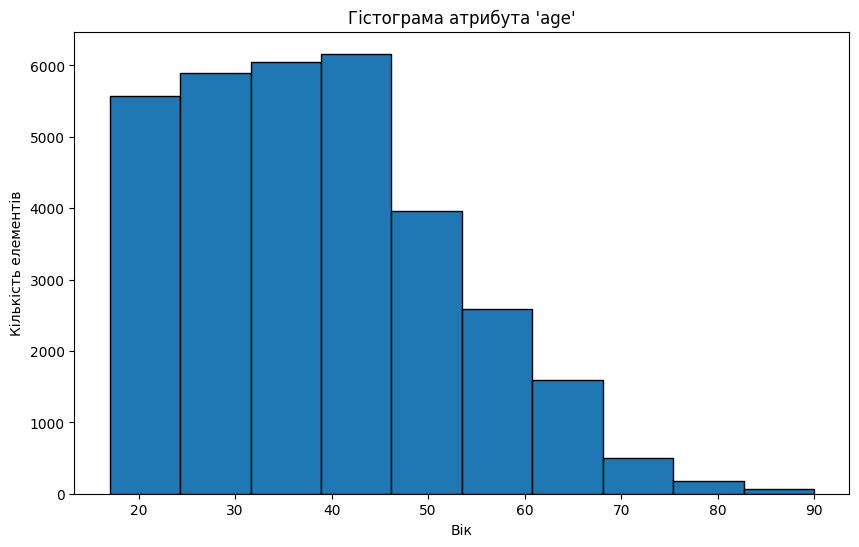

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='black')  
plt.title("Гістограма атрибута 'age'")
plt.xlabel("Вік")
plt.ylabel("Кількість елементів")
plt.show()

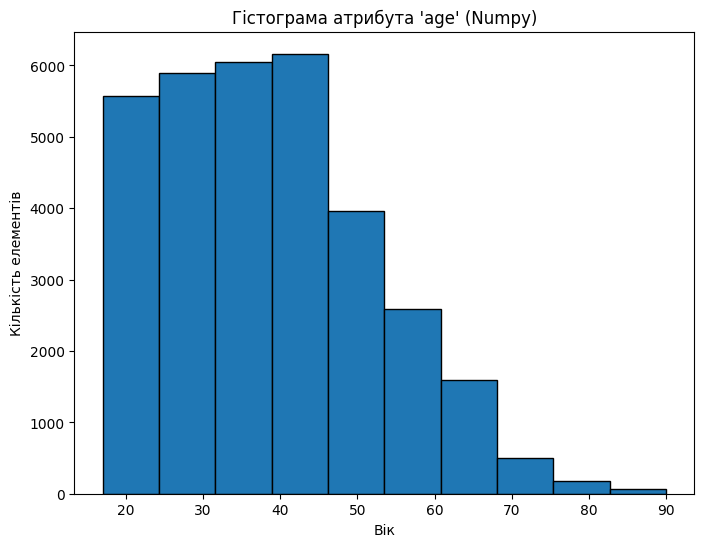

In [ ]:
age_col = data_np[:, 0] 

plt.figure(figsize=(8, 6))
plt.hist(age_col, bins=10, edgecolor='black')  
plt.title("Гістограма атрибута 'age' (Numpy)")
plt.xlabel("Вік")
plt.ylabel("Кількість елементів")
plt.show()

#### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

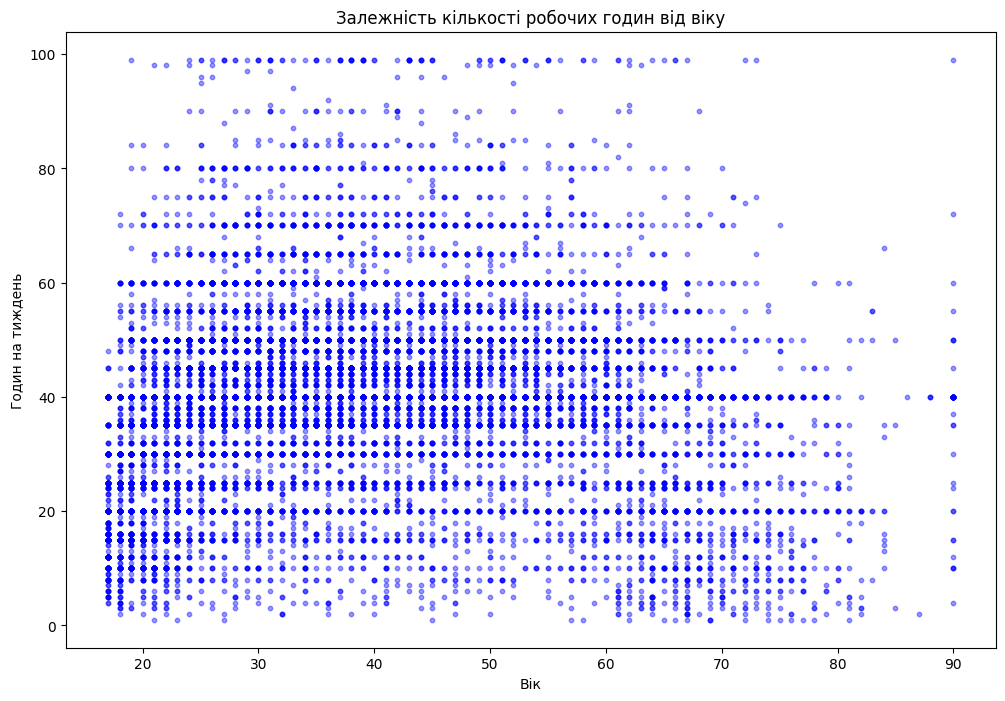

In [ ]:
plt.figure(figsize=(12, 8))          
plt.scatter(
    df['age'], 
    df['hours_per_week'], 
    color='blue', 
    alpha=0.4,      
    s=10             
)
plt.xlabel("Вік")
plt.ylabel("Годин на тиждень")
plt.title("Залежність кількості робочих годин від віку")
plt.show()

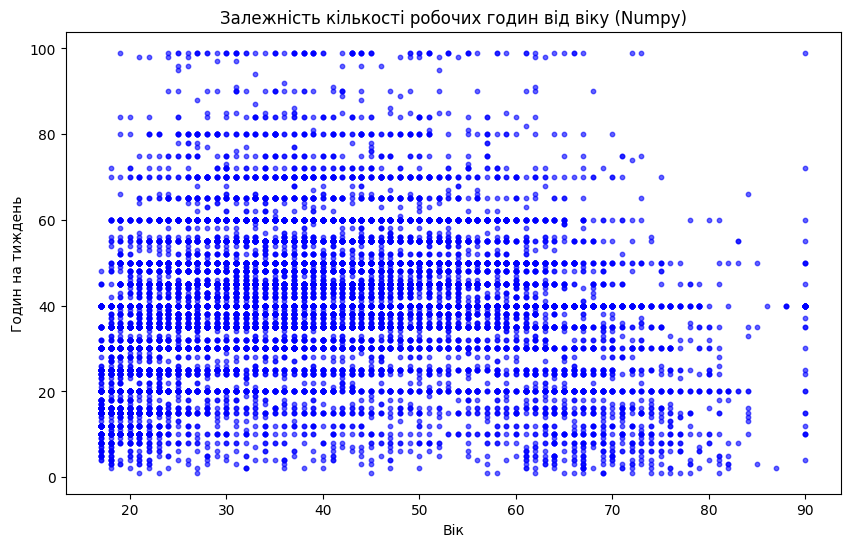

In [ ]:
x = data_np[:, 0] 
y = data_np[:, 5] 

plt.figure(figsize=(10, 6))       
plt.scatter(x, y, color='blue', alpha=0.6, s=10)
plt.xlabel("Вік")
plt.ylabel("Годин на тиждень")
plt.title("Залежність кількості робочих годин від віку (Numpy)")
plt.show()

##### 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [ ]:
x = df['age'].astype(float)          
y = df['hours_per_week'].astype(float)

pearson_coef, p_value_pearson = pearsonr(x, y)

spearman_coef, p_value_spearman = spearmanr(x, y)

print("Коефіцієнт кореляції Пірсона: ", pearson_coef)
print("P-value для Пірсона: ", p_value_pearson)
print("Коефіцієнт кореляції Спірмена: ", spearman_coef)
print("P-value для Спірмена: ", p_value_spearman)

Коефіцієнт кореляції Пірсона:  0.06875570750955738
P-value для Пірсона:  2.0112855621113547e-35
Коефіцієнт кореляції Спірмена:  0.14290681031958297
P-value для Спірмена:  4.0467975717528636e-148


In [ ]:
x = data_np[:, 0] 
y = data_np[:, 5] 

pearson_corr, p_value_pearson = pearsonr(x, y)

spearman_corr, p_value_spearman = spearmanr(x, y)

print("Коефіцієнт кореляції Пірсона:", pearson_corr)
print("p-value для Пірсона:", p_value_pearson)
print("Коефіцієнт кореляції Спірмена:", spearman_corr)
print("p-value для Спірмена:", p_value_spearman)

Коефіцієнт кореляції Пірсона: 0.06875570750955738
p-value для Пірсона: 2.0112855621113547e-35
Коефіцієнт кореляції Спірмена: 0.14290681031958297
p-value для Спірмена: 4.0467975717528636e-148


#### 6. Провести One Hot Encoding категоріального string атрибуту.

In [ ]:
categorical_col = "workclass"

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoded = encoder.fit_transform(df[[categorical_col]])

onehot_df = pd.DataFrame(onehot_encoded, 
                         columns=encoder.get_feature_names_out([categorical_col]))

onehot_df.index = df.index

df_encoded = pd.concat([df, onehot_df], axis=1)

print(df_encoded.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  ...  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  ...   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male  ...   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male  ...   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male  ...   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female  ...   

   income  workclass_Federal-gov  workclass_Local-gov workclass_Never-worked  \
0   <=50K                    0.0                  0.0                   

In [ ]:
data_np_str = np.genfromtxt(
    "adult.data",          
    delimiter=",",
    dtype=str,
    skip_header=0,
    encoding="utf-8"
)

print("Форма завантаженого масиву:", data_np_str.shape)

workclass_col = data_np_str[:, 1].reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoded_np = encoder.fit_transform(workclass_col)

print("Форма one-hot закодованого масиву:", onehot_encoded_np.shape)

print("Перші 5 рядків one hot закодованого атрибуту 'workclass':")
print(onehot_encoded_np[:5])

Форма завантаженого масиву: (32561, 15)
Форма one-hot закодованого масиву: (32561, 9)
Перші 5 рядків one hot закодованого атрибуту 'workclass':
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


#### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

<Figure size 1200x1000 with 0 Axes>

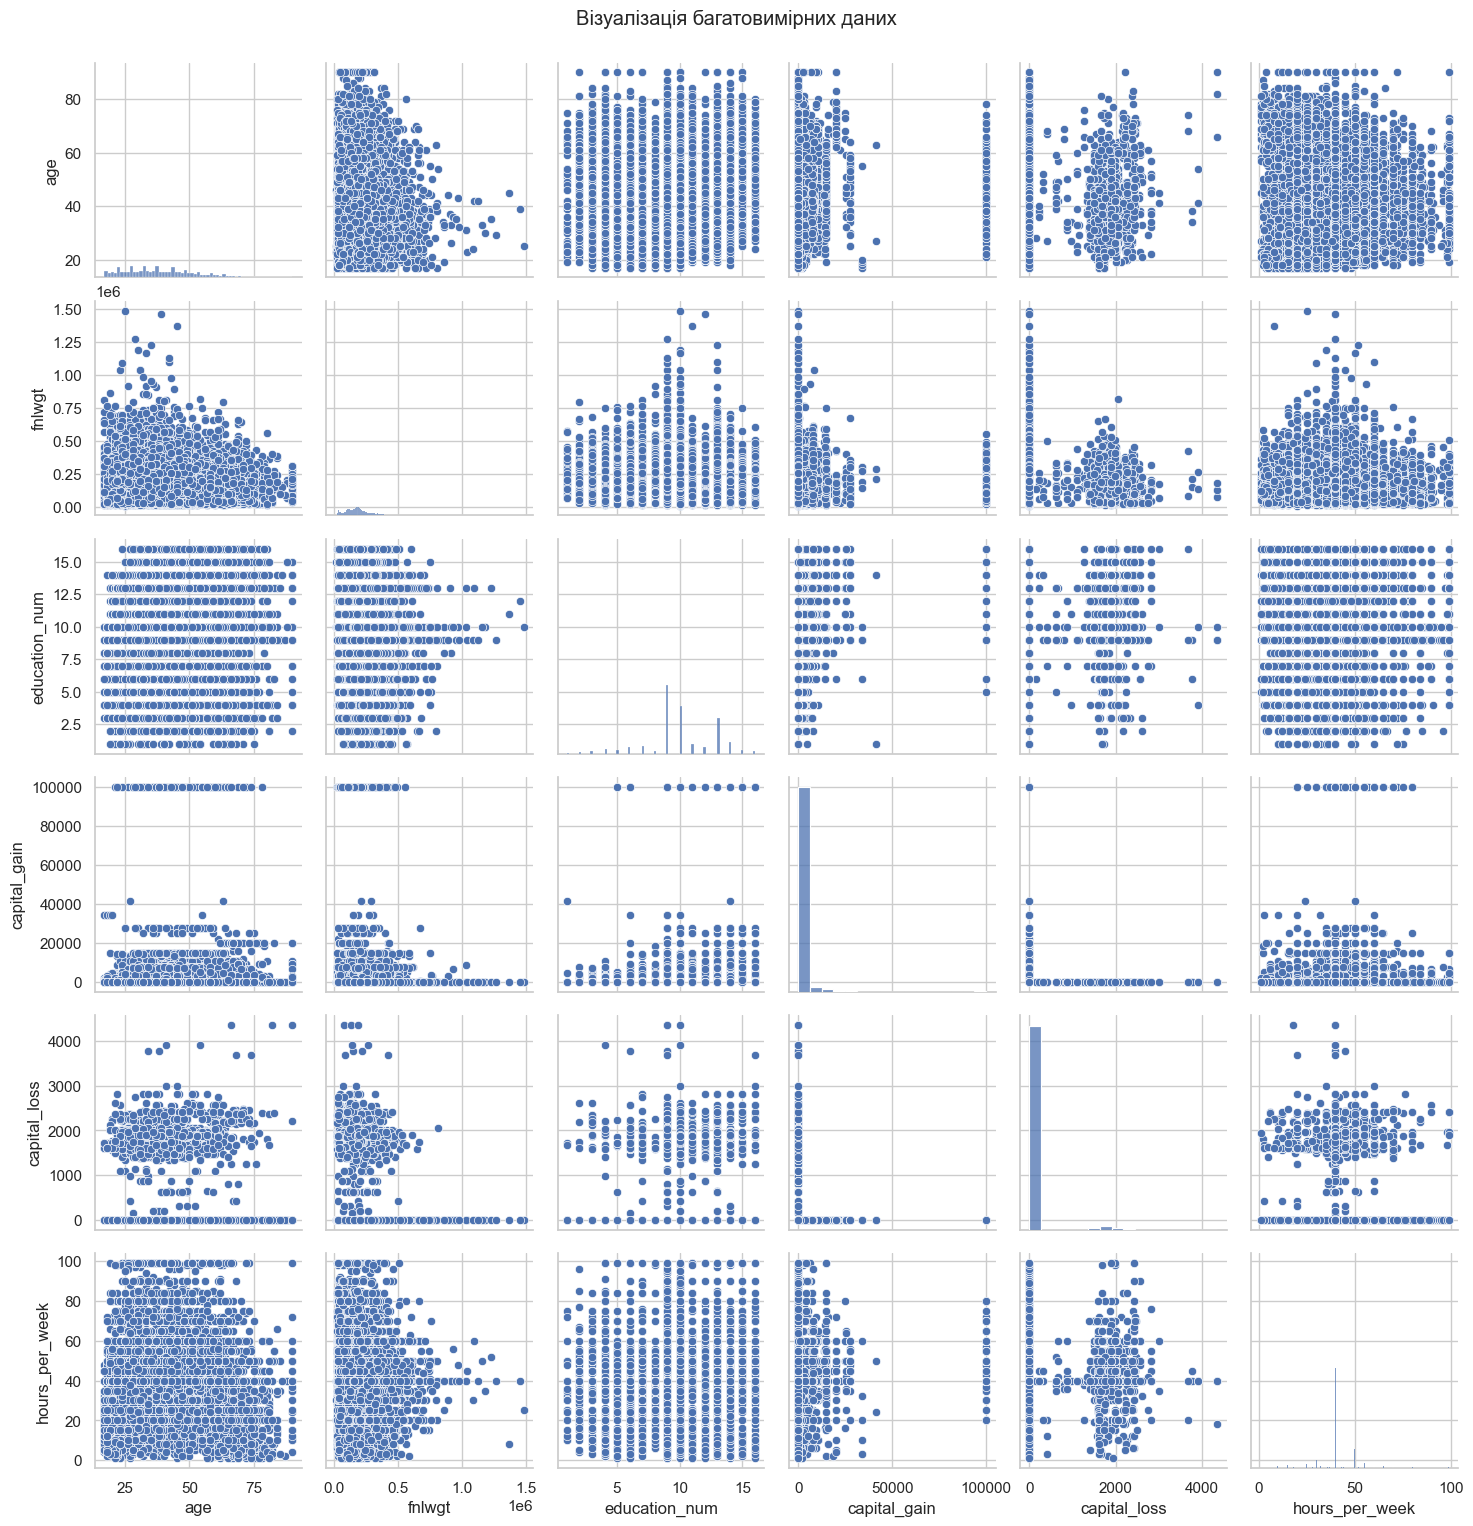

In [ ]:


numeric_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df[numeric_cols])
pairplot.fig.suptitle("Візуалізація багатовимірних даних", y=1.02)
plt.show()

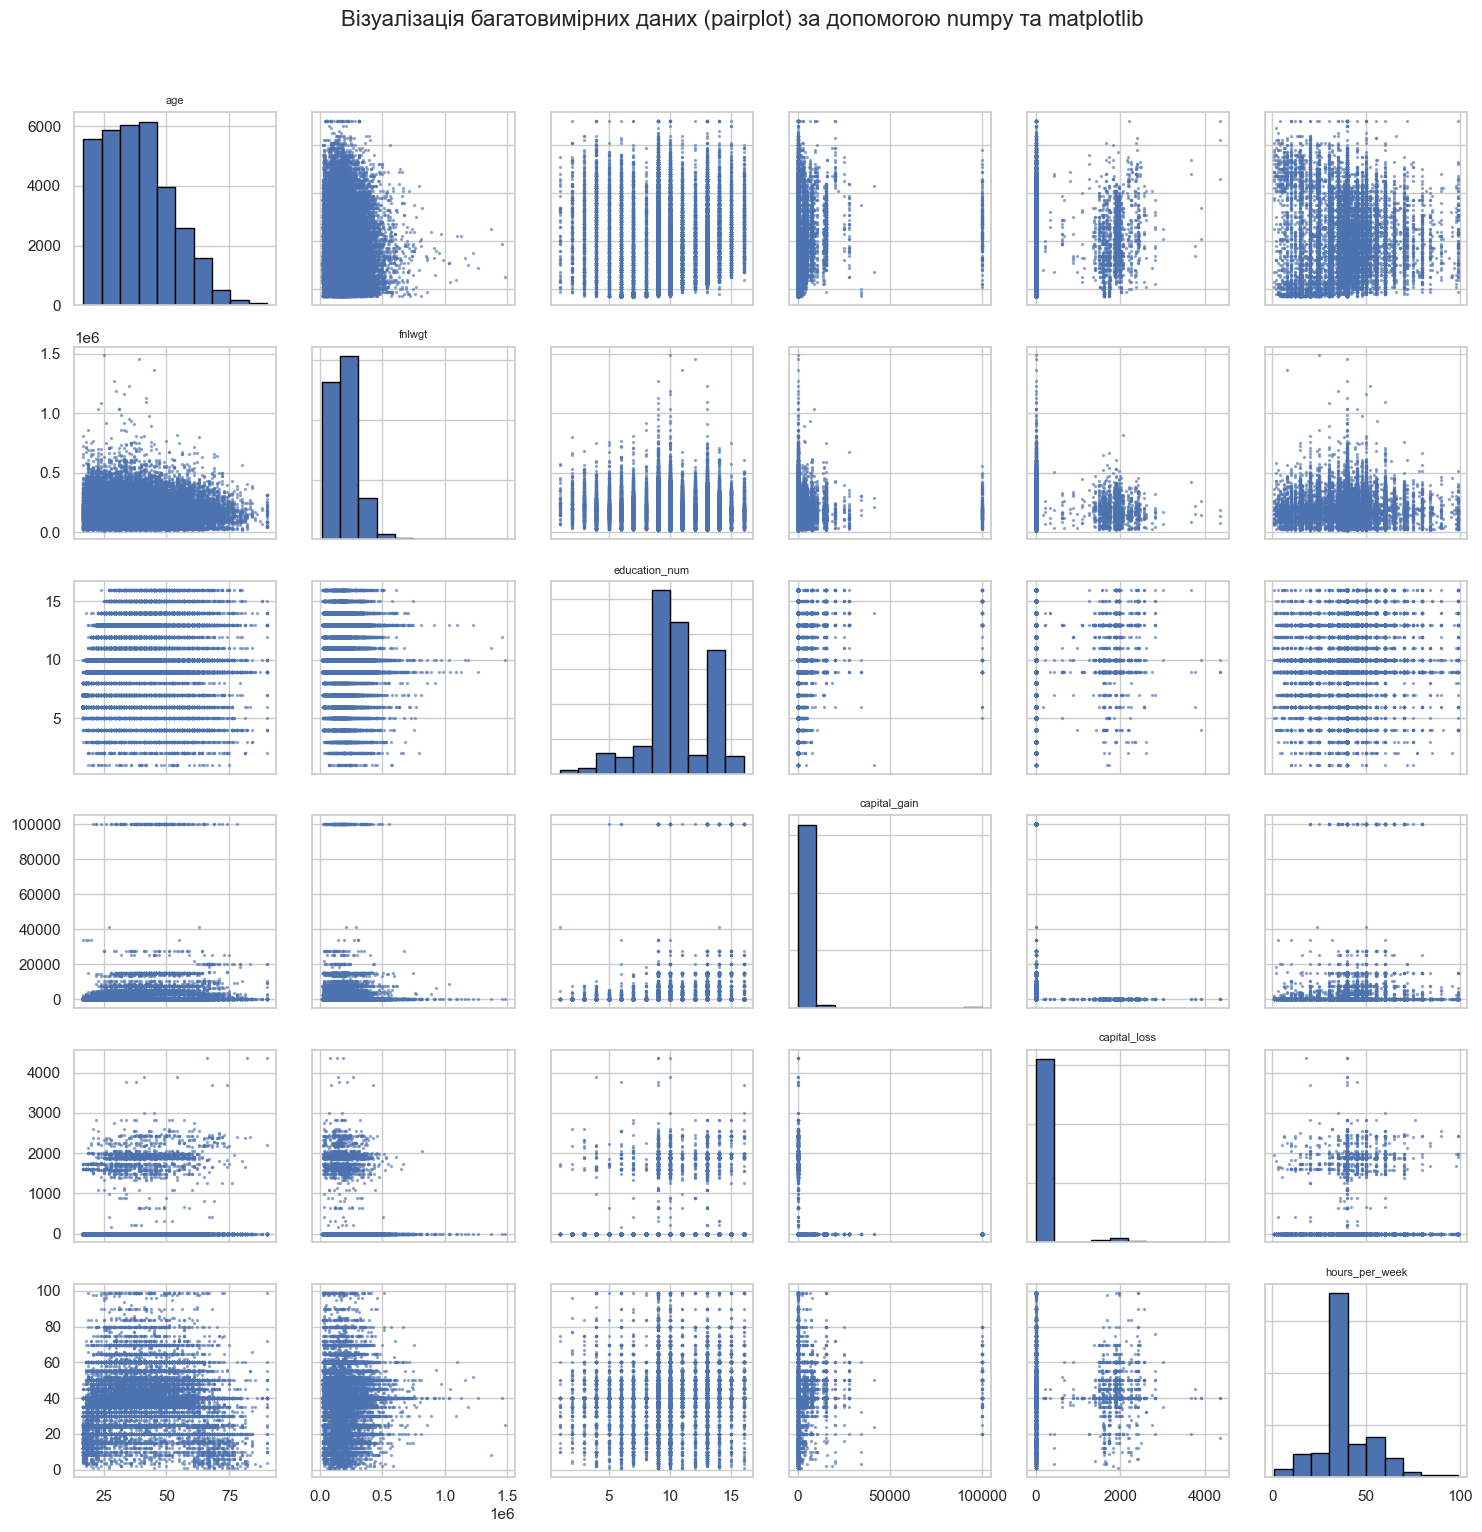

In [ ]:
numeric_cols = (0, 2, 4, 10, 11, 12)



col_names = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

n_features = data_np.shape[1]  


fig, axs = plt.subplots(n_features, n_features, figsize=(15, 15))

for i in range(n_features):
    for j in range(n_features):
        ax = axs[i, j]
        if i == j:
            
            ax.hist(data_np[:, i], bins=10, edgecolor='black')
            ax.set_title(col_names[i], fontsize=8)
        else:
          
            ax.scatter(data_np[:, j], data_np[:, i], alpha=0.5, s=2)
        
        if i < n_features - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

plt.suptitle("Візуалізація багатовимірних даних (pairplot) за допомогою numpy та matplotlib", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()